In [62]:
import pandas as pd 
import numpy as np 
import matplotlib
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [63]:
df = pd.read_csv(("cancer_data.csv"))
df

Gender  Symptoms  Alcohol  Hepatitis B Surface Antigen  \
0         1         0        1                            0   
1         0         1        0                            0   
2         1         0        1                            1   
3         1         1        1                            0   
4         1         1        1                            1   
..      ...       ...      ...                          ...   
126       1         0        0                            0   
127       1         0        1                            0   
128       1         0        0                            1   
129       0         1        1                            0   
130       0         1        0                            0   

     Hepatitis B e Antigen  Hepatitis B Core Antibody  \
0                        0                          0   
1                        0                          0   
2                        0                          1   
3                        0                          0   
4                        0                          1   
..                     ...                        ...   
126                      0                          0   
127                      0                          0   
128                      0                          0   
129                      0                          0   
130                      0                          0   

     Hepatitis C Virus Antibody  Cirrhosis  Endemic Countries  Smoking  ...  \
0                             0          1                  0        1  ...   
1                             1          1                  0        1  ...   
2                             0          1                  0        1  ...   
3                             0          1                  0        1  ...   
4                             0          1                  0        1  ...   
..                          ...        ...                ...      ...  ...   
126                           1          1                  0        1  ...   
127                           0          1                  0        0  ...   
128                           0          1                  0        1  ...   
129                           0          1                  0        0  ...   
130                           0          1                  0        0  ...   

     Alkaline phosphatase (U/L)  Total Proteins (g/dL)  Creatinine (mg/dL)  \
0                         150.0                    7.1                0.70   
1                         215.0                    8.7                2.95   
2                         109.0                    7.0                2.10   
3                         174.0                    8.1                1.11   
4                         109.0                    6.9                1.80   
..                          ...                    ...                 ...   
126                       117.0                    7.2                0.69   
127                       182.0                    6.2                0.77   
128                       127.0                    6.9                1.11   
129                       171.0                    7.1                0.66   
130                       150.0                    5.4                0.70   

     Number of Nodules  Major dimension of nodule (cm)  \
0                    1                             3.5   
1                    1                             1.8   
2                    5                            13.0   
3                    2                            15.7   
4                    1                             9.0   
..                 ...                             ...   
126                  1                            13.0   
127                  2                             4.3   
128                  2                             4.3   
129                  2                             5.8   
130                  5                 

## **We can see many of 0 & 1 values in the data set, So, We'll take 0 As Female & 1 as Male **

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            131 non-null    int64  
 1   Symptoms                          131 non-null    int64  
 2   Alcohol                           131 non-null    int64  
 3   Hepatitis B Surface Antigen       131 non-null    int64  
 4   Hepatitis B e Antigen             131 non-null    int64  
 5   Hepatitis B Core Antibody         131 non-null    int64  
 6   Hepatitis C Virus Antibody        131 non-null    int64  
 7   Cirrhosis                         131 non-null    int64  
 8   Endemic Countries                 131 non-null    int64  
 9   Smoking                           131 non-null    int64  
 10  Diabetes                          131 non-null    int64  
 11  Obesity                           131 non-null    int64  
 12  Hemochro

In [65]:
count_gender = df.loc[df.Gender].count()[0]
count_gender # count of gender data 

131

In [66]:
#converting all columns containing 0 & 1 numnbers denoting male and female values

list = [df.columns[0:23]]

for i in list:
    df[i] = df[i].replace([1], "male")
    df[i] = df[i].replace([0], "female")

df.head() #values are changed

Gender Symptoms Alcohol Hepatitis B Surface Antigen Hepatitis B e Antigen  \
0    male   female    male                      female                female   
1  female     male  female                      female                female   
2    male   female    male                        male                female   
3    male     male    male                      female                female   
4    male     male    male                        male                female   

  Hepatitis B Core Antibody Hepatitis C Virus Antibody Cirrhosis  \
0                    female                     female      male   
1                    female                       male      male   
2                      male                     female      male   
3                    female                     female      male   
4                      male                     female      male   

  Endemic Countries Smoking  ... Alkaline phosphatase (U/L)  \
0            female    male  ...                      150.0   
1            female    male  ...                      215.0   
2            female    male  ...                      109.0   
3            female    male  ...                      174.0   
4            female    male  ...                      109.0   

  Total Proteins (g/dL) Creatinine (mg/dL) Number of Nodules  \
0                   7.1               0.70                 1   
1                   8.7               2.95                 1   
2                   7.0               2.10                 5   
3                   8.1               1.11                 2   
4                   6.9               1.80                 1   

  Major dimension of nodule (cm) Direct Bilirubin (mg/dL) Iron (mcg/dL)  \
0                            3.5                     0.50          86.0   
1                            1.8                     1.96          86.0   
2                           13.0                     0.10          28.0   
3                           15.7                     0.20          86.0   
4                            9.0                     1.96          59.0   

  Oxygen Saturation (%) Ferritin Class  
0                  37.0    435.0     1  
1                  37.0    435.0     1  
2                   6.0     16.0     1  
3                  37.0    435.0     0  
4                  15.0     22.0     1  

[5 rows x 50 columns]

## Pandas Profiling Report 

In [67]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df)
# profile.to_file(output_file = "cancer_data.html" ) # creation of pandas profile report for easy understanding of the data

In [68]:
df.shape # there are 40260 rows and 7 columns of data

(131, 50)

### In Data Analysis We will Analyze To Find out the below stuff ###
### 1. Missing Values ###
### 2. All The Numerical Variables ###
### 3. Distribution of the Numerical Variables ###
### 4. Categorical Variables ###
### 5. Outliers ###
### 6. Relationship between independent and dependent feature(SalePrice) ###

# ** 1. Missing Values**

In [69]:
## Here we will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1] #list comprehension use

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

### There are no missing values in the data set 

# ** 2. All The Numerical Variables **

In [70]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O'] # list comprehension feature that are not equal to object type

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  27


Age at diagnosis  Grams of Alcohol per day  Packs of cigarets per year:  \
0                67                       137                         15.0   
1                62                         0                         23.0   
2                78                        50                         50.0   
3                77                        40                         30.0   
4                76                       100                         30.0   

   Performance Status  Encefalopathy degree  Ascites degree  \
0                   0                     1               1   
1                   0                     1               1   
2                   2                     1               2   
3                   0                     1               1   
4                   0                     1               1   

   International Normalised Ratio:  Alpha-Fetoprotein (ng/mL)  \
0                             1.53                       95.0   
1                             1.39                    22427.0   
2                             0.96                        5.8   
3                             0.95                     2440.0   
4                             0.94                       49.0   

   Haemoglobin (g/dL)  Mean Corpuscular Volume (fl)  ...  \
0               13.70                         106.6  ...   
1               12.79                          94.5  ...   
2                8.90                          79.8  ...   
3               13.40                          97.1  ...   
4               14.30                          95.1  ...   

   Alkaline phosphatase (U/L)  Total Proteins (g/dL)  Creatinine (mg/dL)  \
0                       150.0                    7.1                0.70   
1                       215.0                    8.7                2.95   
2                       109.0                    7.0                2.10   
3                       174.0                    8.1                1.11   
4                       109.0                    6.9                1.80   

   Number of Nodules  Major dimension of nodule (cm)  \
0                  1                             3.5   
1                  1                             1.8   
2                  5                            13.0   
3                  2                            15.7   
4                  1                             9.0   

   Direct Bilirubin (mg/dL)  Iron (mcg/dL)  Oxygen Saturation (%)  Ferritin  \
0                      0.50           86.0                   37.0     435.0   
1                      1.96           86.0                   37.0     435.0   
2                      0.10           28.0                    6.0      16.0   
3                      0.20           86.0                   37.0     435.0   
4                      1.96           59.0                   15.0      22.0   

   Class  
0      1  
1      1  
2      1  
3      0  
4      1  

[5 rows x 27 columns]

In [71]:
numerical_features

['Age at diagnosis',
 'Grams of Alcohol per day',
 'Packs of cigarets per year:',
 'Performance Status',
 'Encefalopathy degree',
 'Ascites degree',
 'International Normalised Ratio:',
 'Alpha-Fetoprotein (ng/mL)',
 'Haemoglobin (g/dL)',
 'Mean Corpuscular Volume (fl)',
 'Leukocytes(G/L)',
 'Platelets (G/L)',
 'Albumin (mg/dL)',
 'Total Bilirubin(mg/dL)',
 'Alanine transaminase (U/L)',
 'Aspartate transaminase (U/L)',
 'Gamma glutamyl transferase (U/L)',
 'Alkaline phosphatase (U/L)',
 'Total Proteins (g/dL)',
 'Creatinine (mg/dL)',
 'Number of Nodules',
 'Major dimension of nodule (cm)',
 'Direct Bilirubin (mg/dL)',
 'Iron (mcg/dL)',
 'Oxygen Saturation (%)',
 'Ferritin',
 'Class']

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            131 non-null    object 
 1   Symptoms                          131 non-null    object 
 2   Alcohol                           131 non-null    object 
 3   Hepatitis B Surface Antigen       131 non-null    object 
 4   Hepatitis B e Antigen             131 non-null    object 
 5   Hepatitis B Core Antibody         131 non-null    object 
 6   Hepatitis C Virus Antibody        131 non-null    object 
 7   Cirrhosis                         131 non-null    object 
 8   Endemic Countries                 131 non-null    object 
 9   Smoking                           131 non-null    object 
 10  Diabetes                          131 non-null    object 
 11  Obesity                           131 non-null    object 
 12  Hemochro

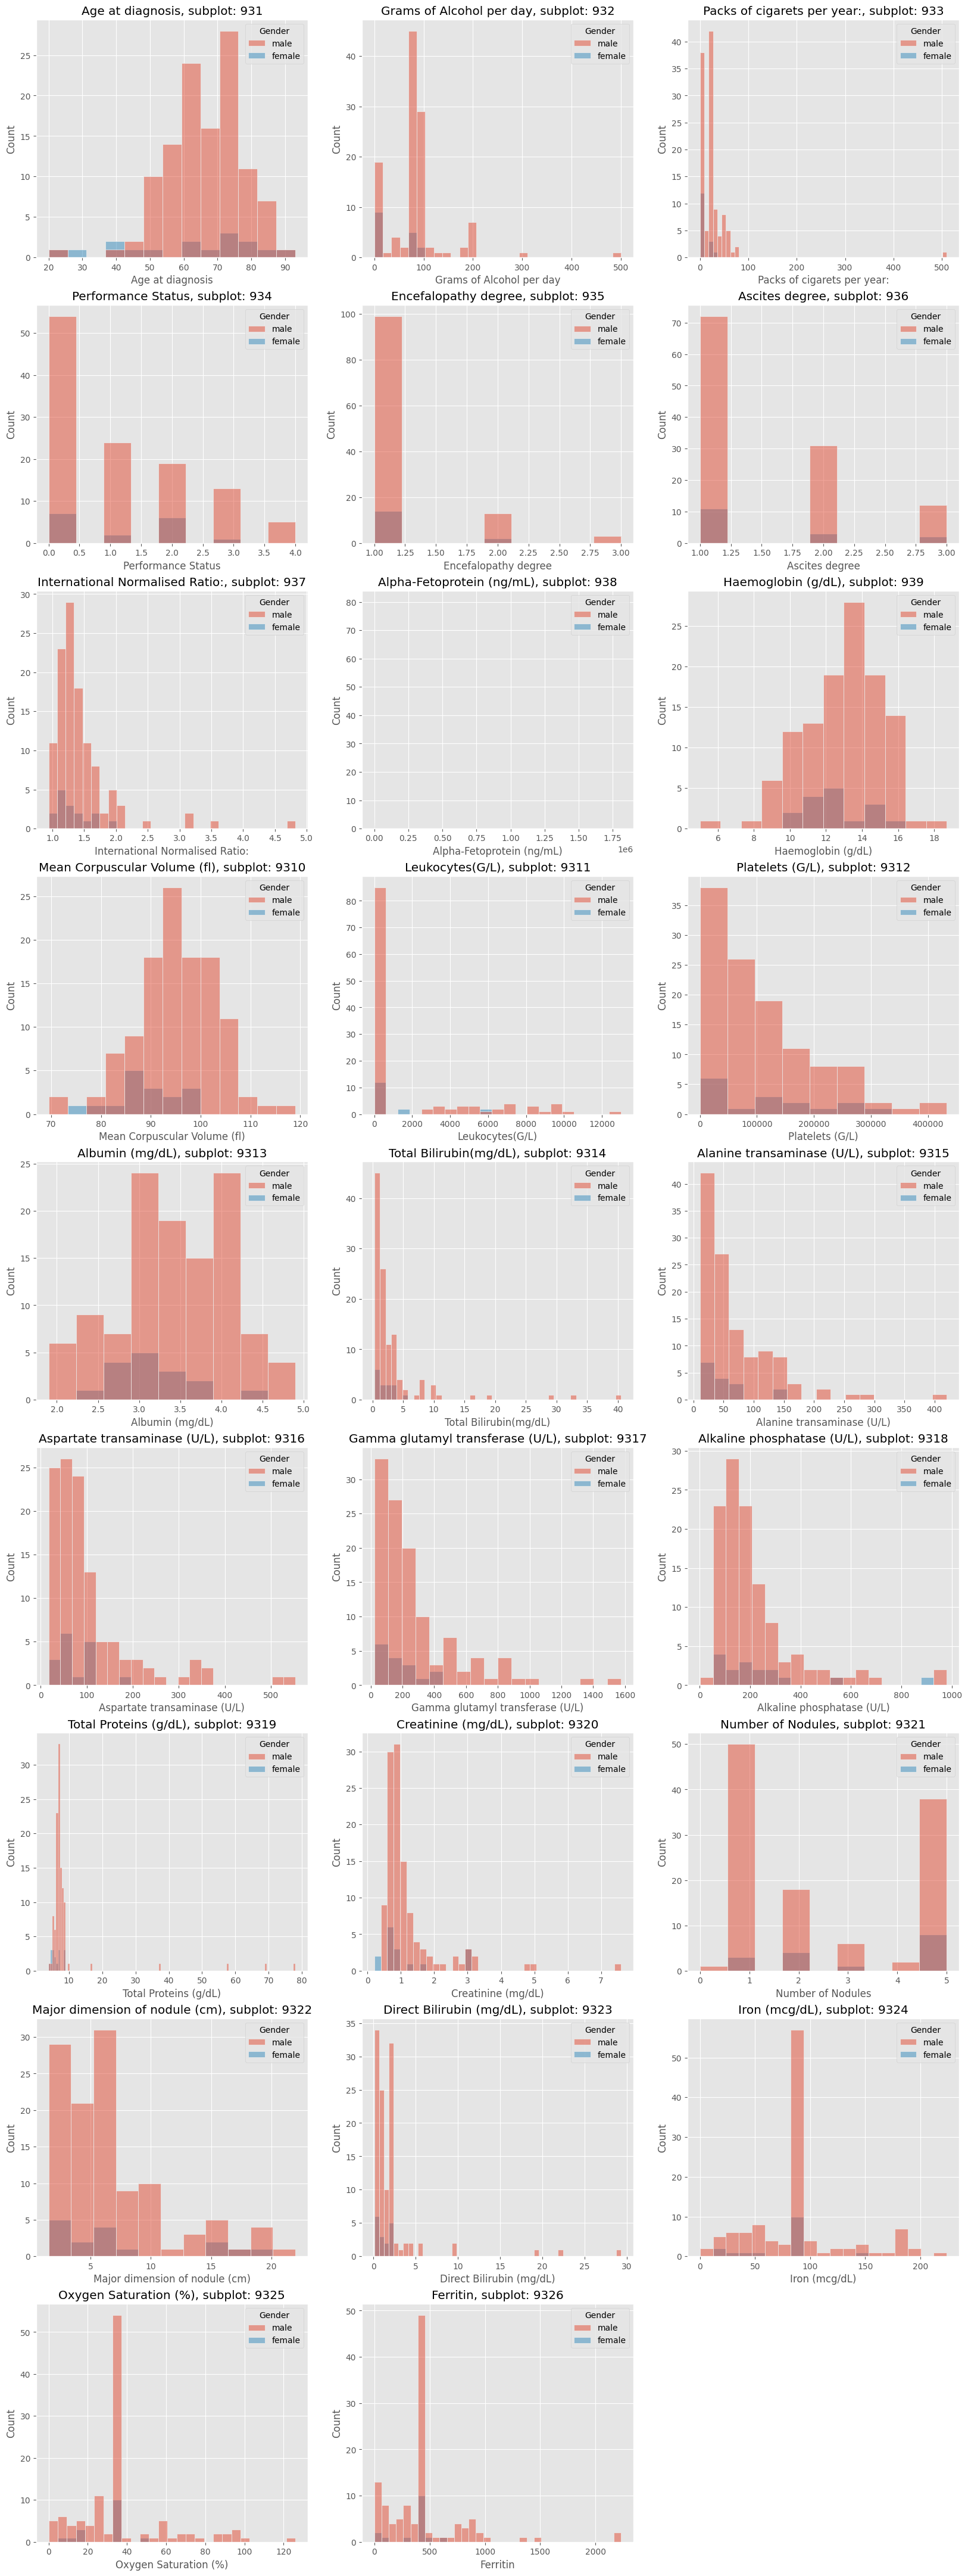

In [73]:

a = 9  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,55))

for i in numerical_features[0:26]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))

    sns.histplot(data= df, x= i, hue="Gender")
    # plt.title(f" Gender vs {i}")

    c = c + 1

plt.show()

## *let us check for decreate values*

In [74]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 6


In [75]:
df[discrete_feature].head()

Grams of Alcohol per day  Performance Status  Encefalopathy degree  \
0                       137                   0                     1   
1                         0                   0                     1   
2                        50                   2                     1   
3                        40                   0                     1   
4                       100                   0                     1   

   Ascites degree  Number of Nodules  Class  
0               1                  1      1  
1               1                  1      1  
2               2                  5      1  
3               1                  2      0  
4               1                  1      1

In [76]:
discrete_feature

['Grams of Alcohol per day',
 'Performance Status',
 'Encefalopathy degree',
 'Ascites degree',
 'Number of Nodules',
 'Class']

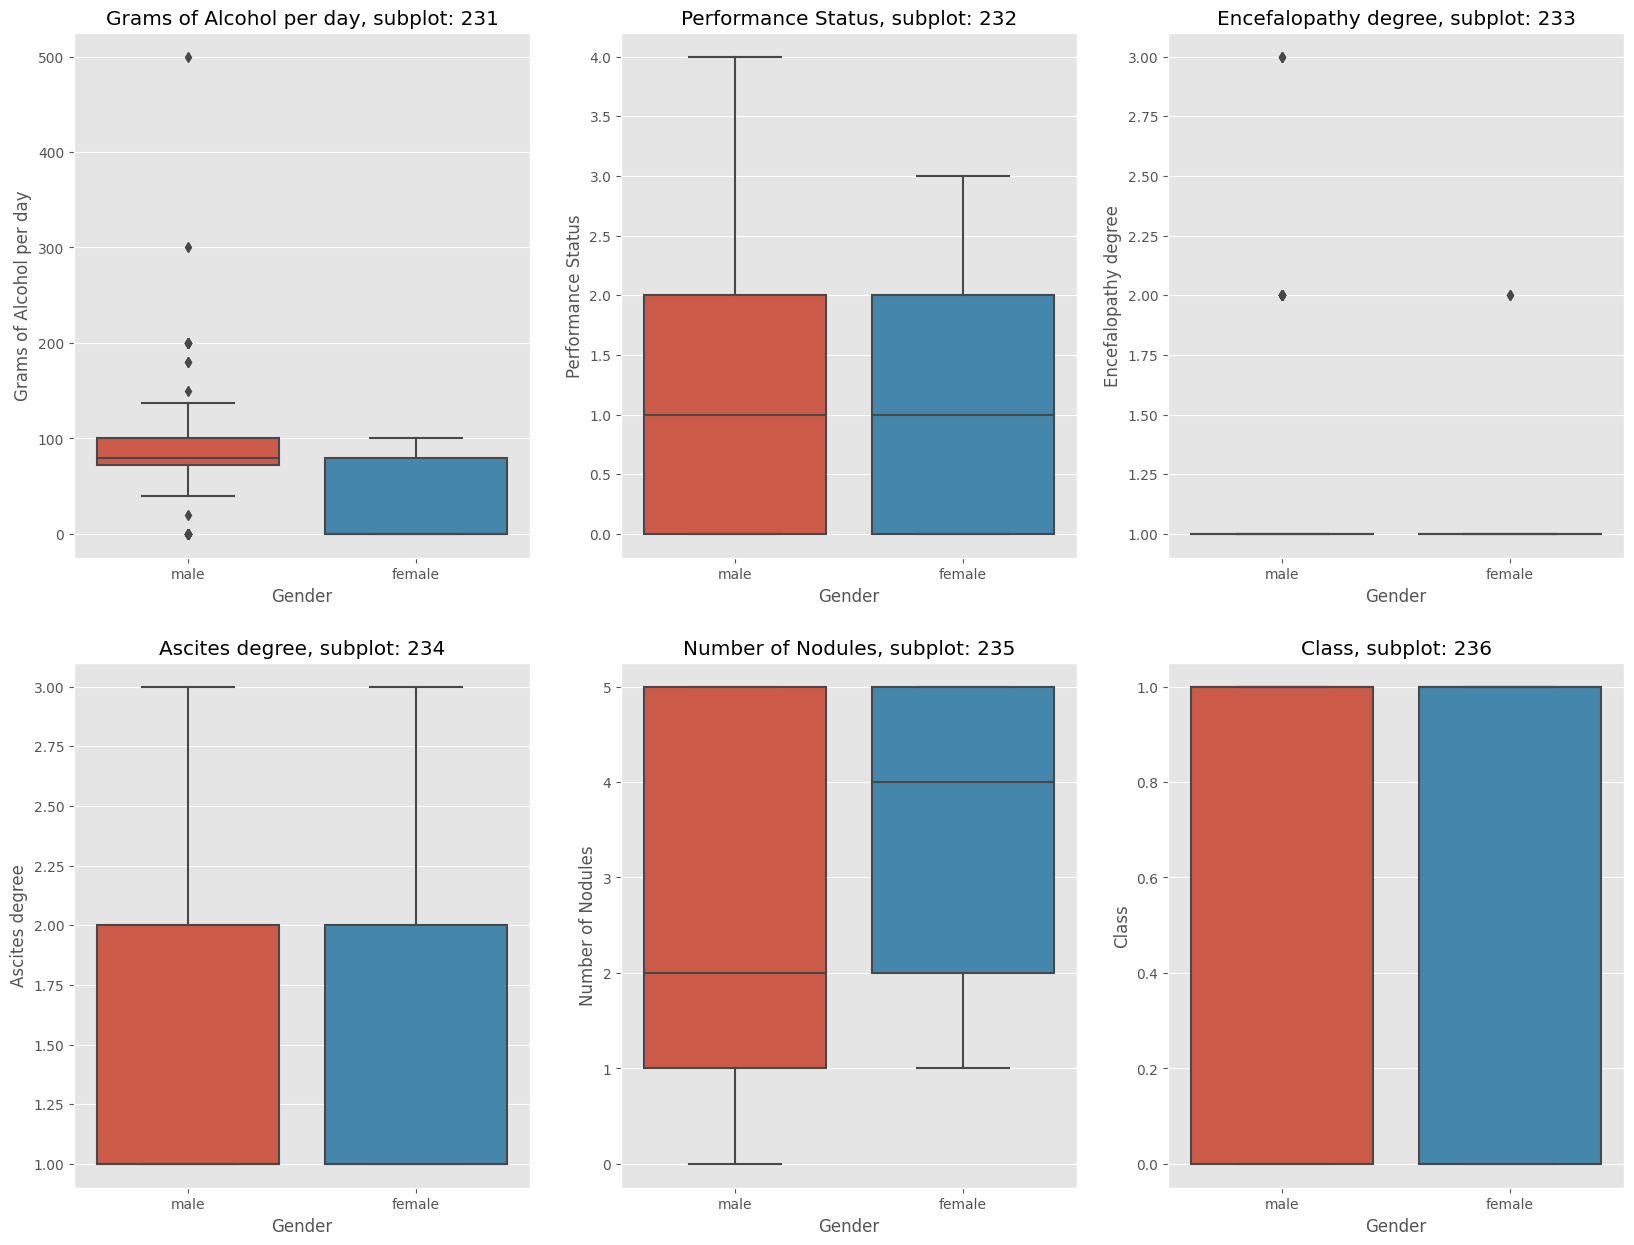

In [77]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in discrete_feature:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))

    sns.boxplot(x="Gender", y = i ,data=df)
      
    # plt.title(f" Gender vs {i}")

    c = c + 1

plt.show()

## ** Continous Features **

In [78]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature ]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 21


In [79]:
continuous_feature
len(continuous_feature)

21

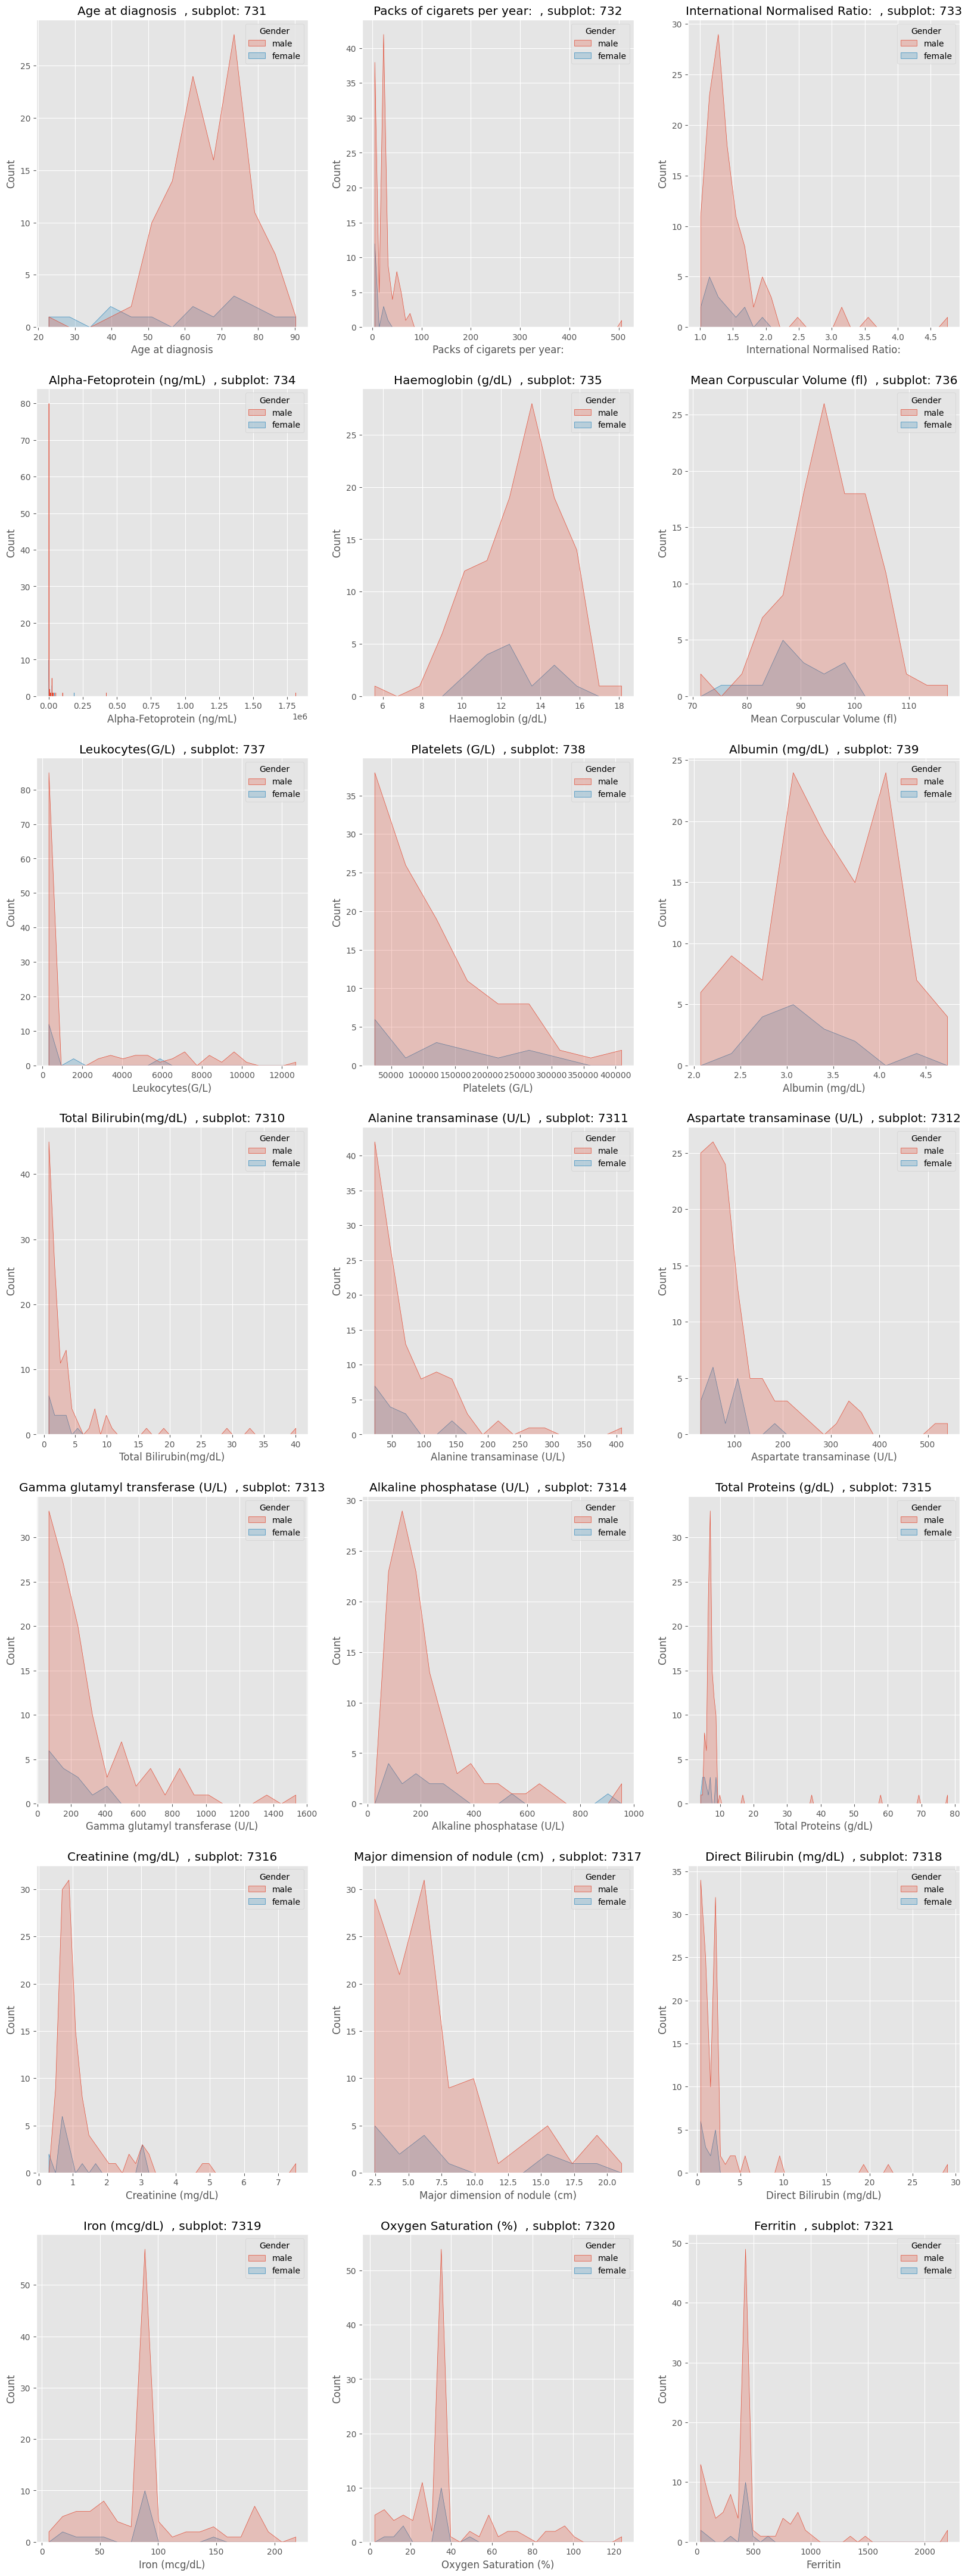

In [80]:
a = 7  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,55))

for i in continuous_feature:
    plt.subplot(a, b, c)
    plt.title('{}  , subplot: {}{}{}'.format(i, a, b, c))

    sns.histplot(data= df, x= i, hue="Gender", element="poly")

    c = c + 1

plt.show()

# **OUTLIERS **

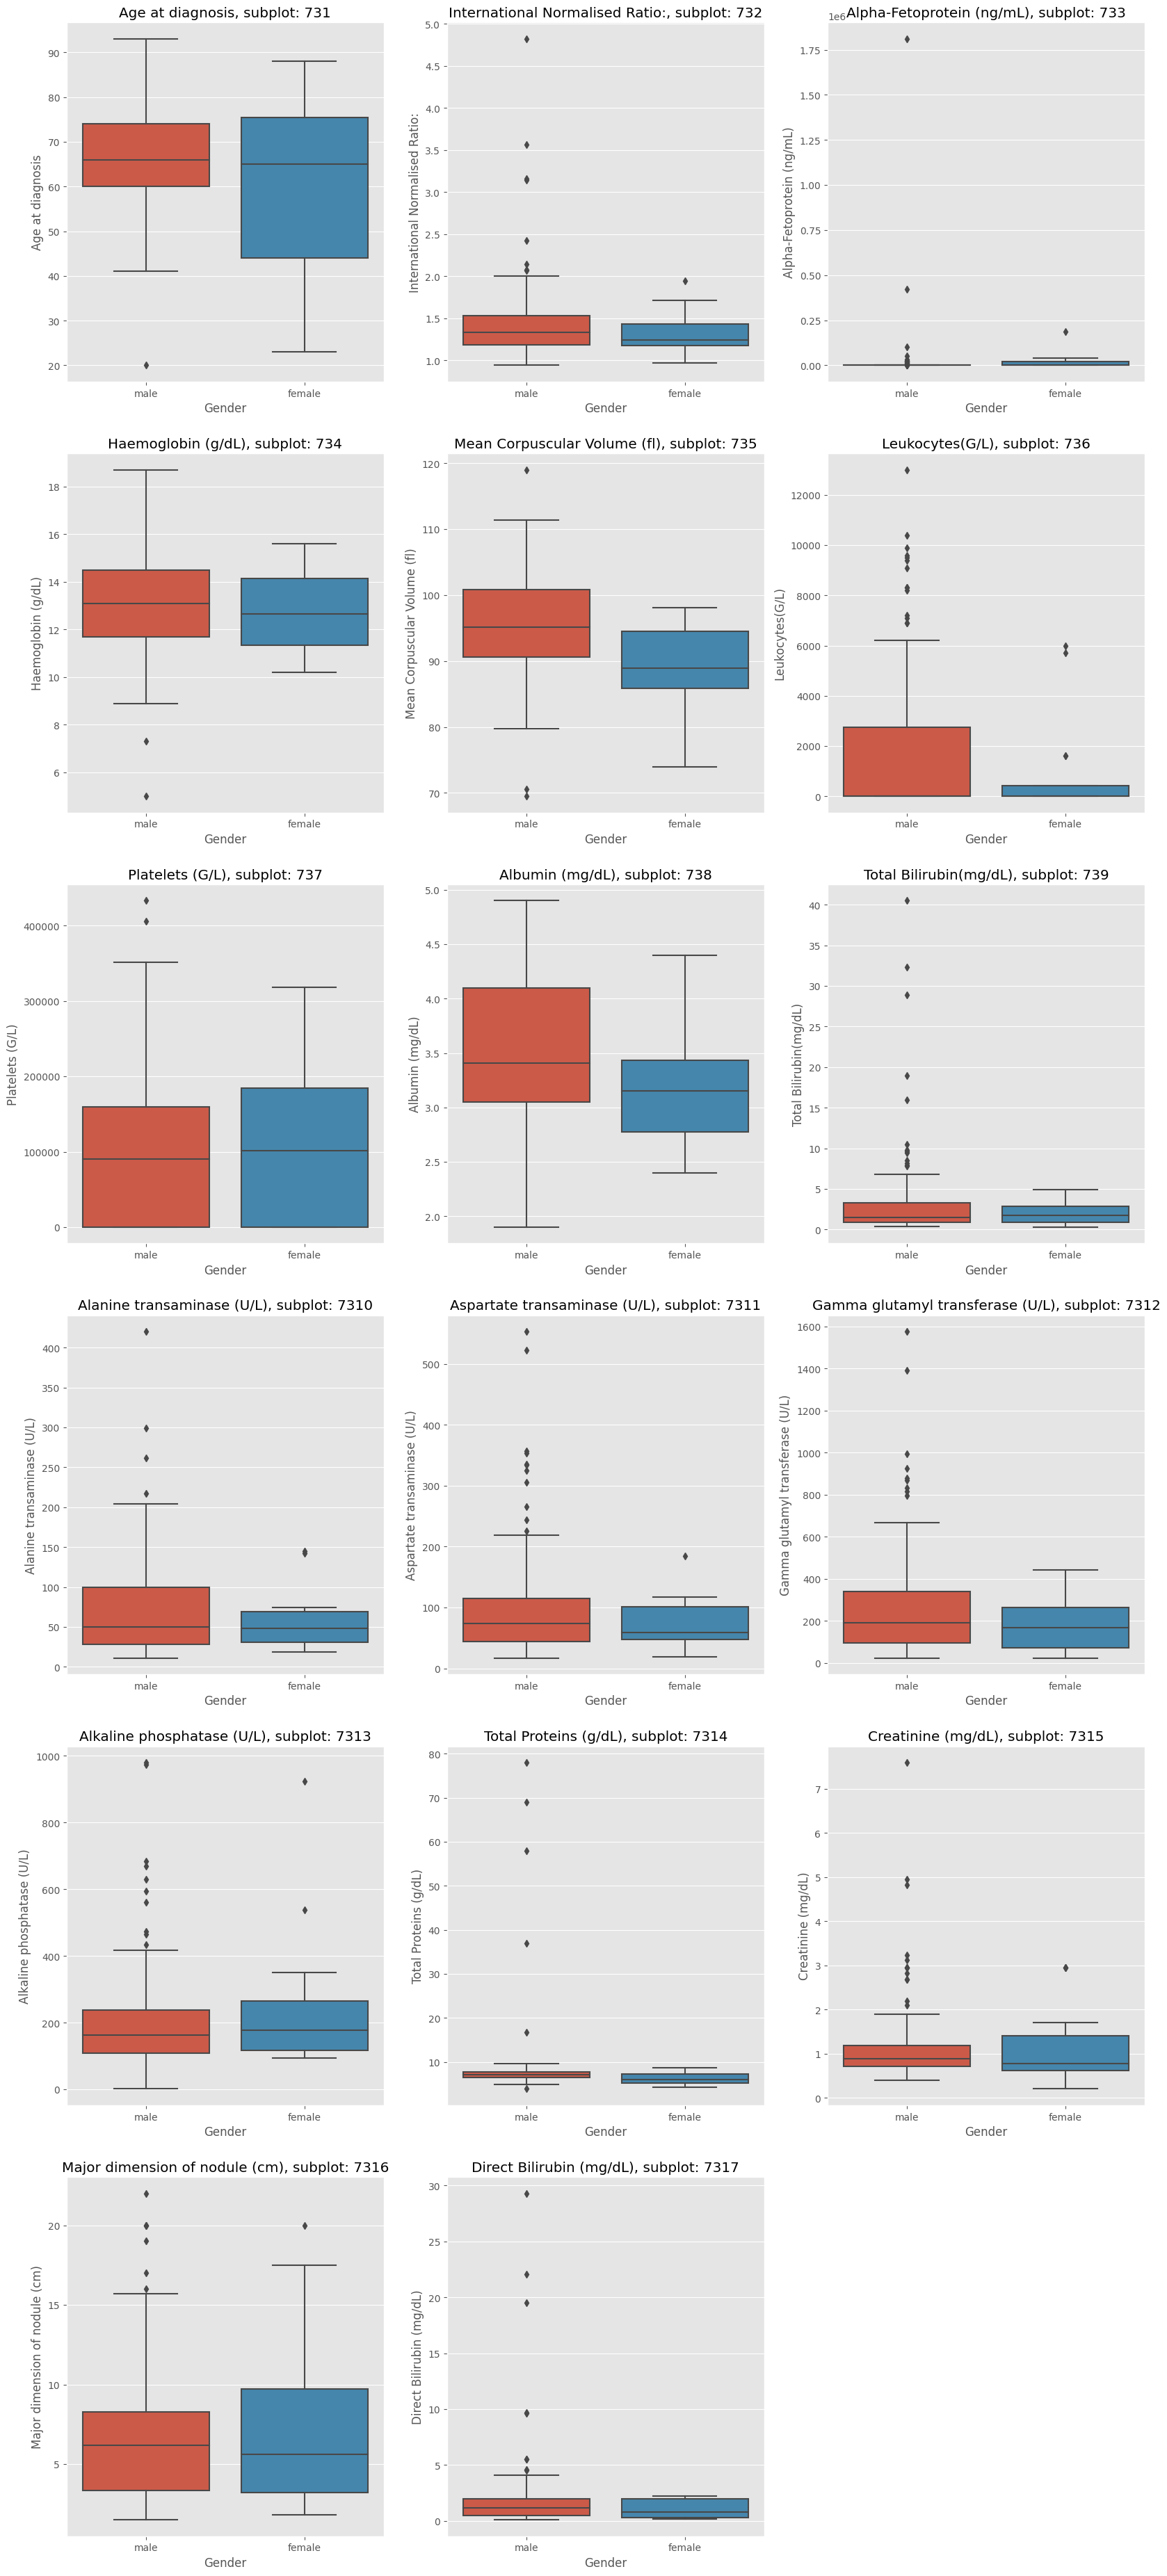

In [81]:
a = 7  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,55))

plt.style.use("ggplot")

for i in continuous_feature:
    data=df.copy()

    if 0 in data[i].unique():
        pass
    else:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))

        sns.boxplot(x="Gender", y = i ,data=df)

        c = c + 1

plt.show()


## ** categorical vairables **

In [82]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Gender',
 'Symptoms',
 'Alcohol',
 'Hepatitis B Surface Antigen',
 'Hepatitis B e Antigen',
 'Hepatitis B Core Antibody',
 'Hepatitis C Virus Antibody',
 'Cirrhosis',
 'Endemic Countries',
 'Smoking',
 'Diabetes',
 'Obesity',
 'Hemochromatosis',
 'Arterial Hypertension',
 'Chronic Renal Insufficiency',
 'Human Immunodeficiency Virus',
 'Nonalcoholic Steatohepatitis',
 'Esophageal Varices',
 'Splenomegaly',
 'Portal Hypertension',
 'Portal Vein Thrombosis',
 'Liver Metastasis',
 'Radiological Hallmark']

In [83]:
df[categorical_features].head()

Gender Symptoms Alcohol Hepatitis B Surface Antigen Hepatitis B e Antigen  \
0    male   female    male                      female                female   
1  female     male  female                      female                female   
2    male   female    male                        male                female   
3    male     male    male                      female                female   
4    male     male    male                        male                female   

  Hepatitis B Core Antibody Hepatitis C Virus Antibody Cirrhosis  \
0                    female                     female      male   
1                    female                       male      male   
2                      male                     female      male   
3                    female                     female      male   
4                      male                     female      male   

  Endemic Countries Smoking  ... Arterial Hypertension  \
0            female    male  ...                female   
1            female    male  ...                  male   
2            female    male  ...                  male   
3            female    male  ...                  male   
4            female    male  ...                  male   

  Chronic Renal Insufficiency Human Immunodeficiency Virus  \
0                      female                       female   
1                      female                       female   
2                        male                       female   
3                      female                       female   
4                        male                       female   

  Nonalcoholic Steatohepatitis Esophageal Varices Splenomegaly  \
0                       female               male       female   
1                       female               male       female   
2                       female             female       female   
3                       female             female       female   
4                       female             female       female   

  Portal Hypertension Portal Vein Thrombosis Liver Metastasis  \
0              female                 female           female   
1              female                 female           female   
2                male                 female             male   
3              female                 female             male   
4              female                 female           female   

  Radiological Hallmark  
0                  male  
1                  male  
2                  male  
3                  male  
4                  male  

[5 rows x 23 columns]

In [84]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Gender and number of categories are 2
The feature is Symptoms and number of categories are 2
The feature is Alcohol and number of categories are 2
The feature is Hepatitis B Surface Antigen and number of categories are 2
The feature is Hepatitis B e Antigen and number of categories are 2
The feature is Hepatitis B Core Antibody and number of categories are 2
The feature is Hepatitis C Virus Antibody and number of categories are 2
The feature is Cirrhosis and number of categories are 2
The feature is Endemic Countries and number of categories are 2
The feature is Smoking and number of categories are 2
The feature is Diabetes and number of categories are 2
The feature is Obesity and number of categories are 2
The feature is Hemochromatosis and number of categories are 2
The feature is Arterial Hypertension and number of categories are 2
The feature is Chronic Renal Insufficiency and number of categories are 2
The feature is Human Immunodeficiency Virus and number of catego

In [85]:
len(categorical_features)

23

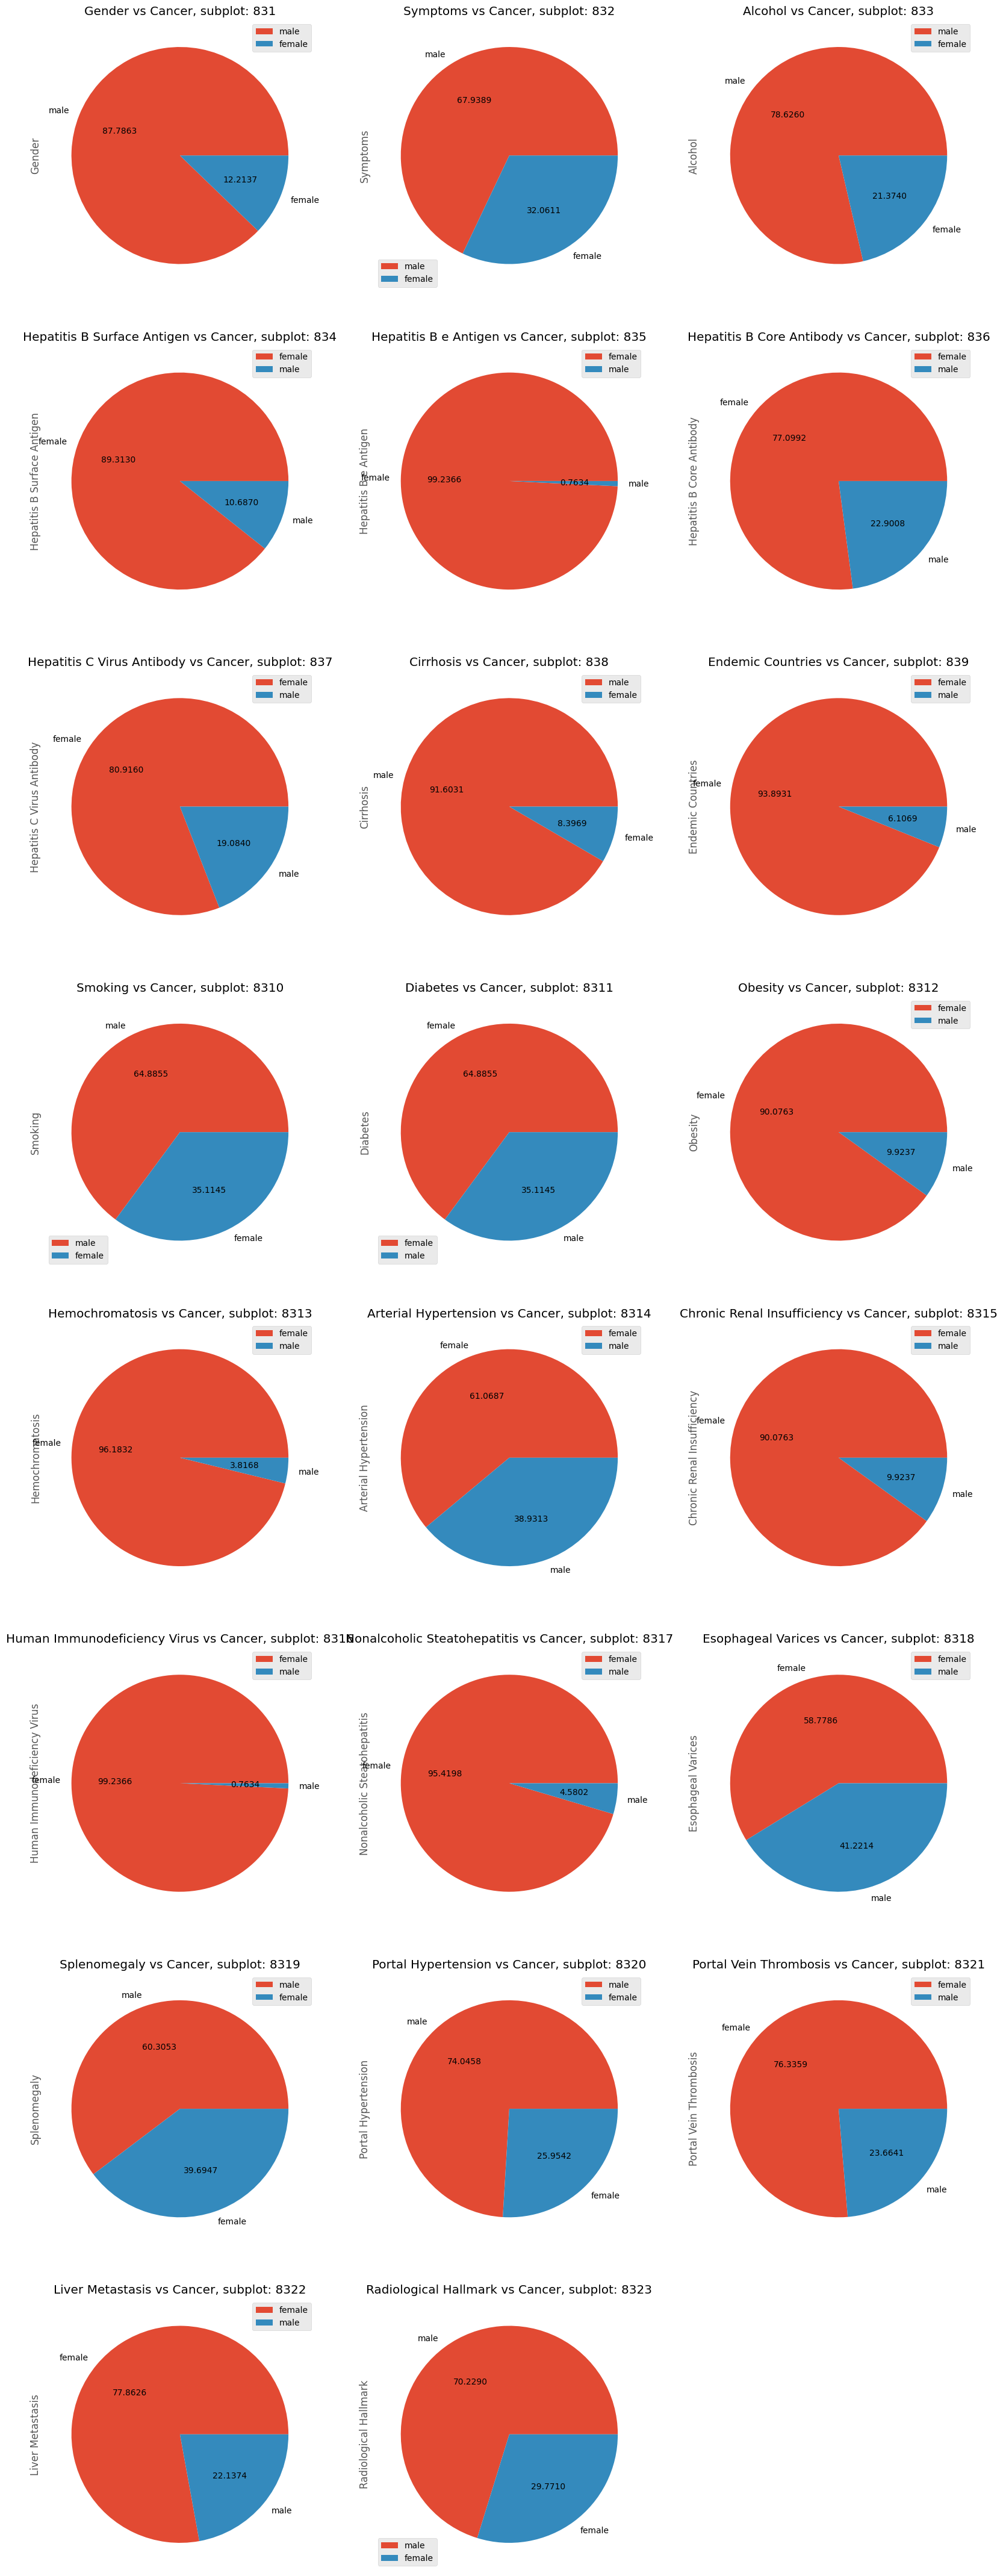

In [86]:
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,55))
plt.style.use("ggplot")

for i in categorical_features:
    plt.subplot(a, b, c)
    plt.title('{} vs Cancer, subplot: {}{}{}'.format(i, a, b, c))
    df[i].value_counts().plot(kind='pie', autopct='%.4f')
    plt.legend(loc = "best")
    

    c = c + 1

plt.show()